In [78]:
from fem_1d_for_students import *
import zipfile, os

Text(0.5, 1.0, '$u_{h,x}$')

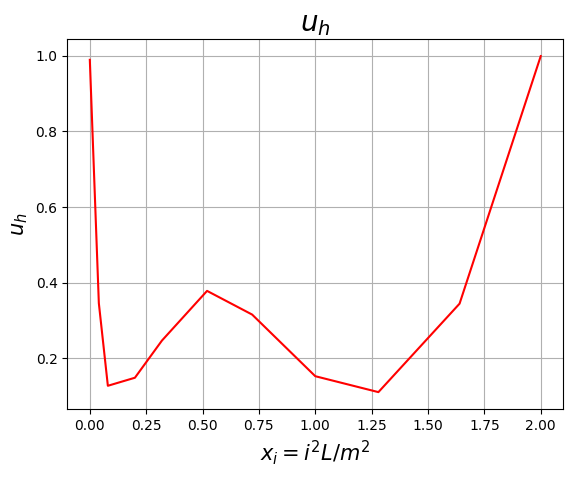

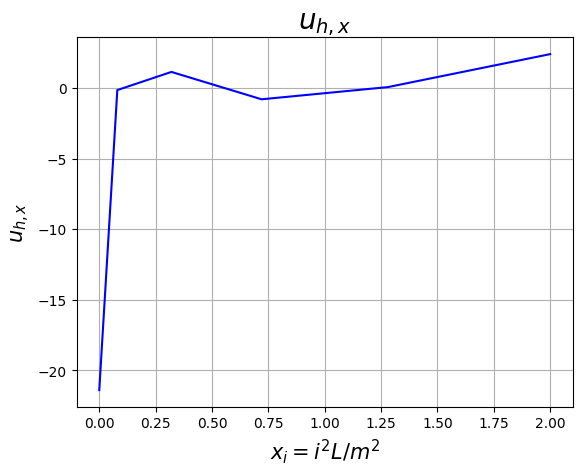

In [79]:
m = 5
p = 2
k = 1
L = 2

neval = 3
x = np.zeros(m+1)

for i in range(0,m+1):
    x[i] = i**(2)*L/m**(2)

with open('coefficients.txt', 'r') as file:
        coefficients = [float(line.strip()) for line in file]
u = np.array(coefficients)

def evaluate_solution(p,k,neval,u, x):
    mesh = create_mesh(brk = x)
    param_map = create_param_map(mesh = mesh)
    fe_space = create_fe_space(deg = p, reg = k, mesh = mesh)
    ref_data = create_ref_data(neval = neval, deg = p, integrate= False)

    reference_basis = ref_data['reference_basis']
    reference_basis_derivatives =  ref_data['reference_basis_derivatives']

    n = fe_space['n']
    extraction_coefficients = fe_space['extraction_coefficients']
    supported_bases = fe_space['supported_bases']
    elements = mesh['elements']
    m = mesh['m']

    

    x_eval = np.zeros([mesh['m'], neval])
    u_eval = np.zeros([mesh['m'], neval])
    du_dx_eval = np.zeros([mesh['m'], neval])
    du_dx = param_map['imap_derivatives']

    for element_index, element in enumerate(mesh['elements'].T):
        x_eval[element_index, :] = np.linspace(element[0], element[-1], neval)
        u_eval[element_index, :] = u[supported_bases[element_index]] @ (extraction_coefficients[element_index][:][:] @ reference_basis)
        du_dx_eval[element_index, :] = u[supported_bases[element_index]] @ (extraction_coefficients[element_index][:][:] @ reference_basis_derivatives) * du_dx[element_index]

    return x_eval.flatten(), u_eval.flatten(), du_dx_eval.flatten()

x_eval, u_eval, du_dx_eval = evaluate_solution(p,k,neval,u, x)
plt.figure()    
plt.plot(x_eval, u_eval, 'r-')
plt.grid()
plt.xlabel(r'$x_i = i^2 L/m^2$', fontsize = 15)
plt.ylabel(r'$u_h$', fontsize = 15)
plt.title(r'$u_{h}$', fontsize = 20)

plt.figure()
plt.plot(x_eval.T, du_dx_eval.T, 'b-')
plt.grid()
plt.xlabel(r'$x_i = i^2 L/m^2$', fontsize = 15)
plt.ylabel(r'$u_{h,x}$', fontsize = 15)
plt.title(r'$u_{h,x}$', fontsize = 20)


In [80]:
def u_h(coefficients, mesh, fe_space, ref_data):
    m = mesh['m']
    elements = mesh['elements']
    reference_basis = ref_data['reference_basis']
    reference_basis_derivatives = ref_data['reference_basis_derivatives']
    extraction_coefficients = ref_data['extraction_coefficients']
    domain = np.linspace(elements[0,0], elements[-1,-1]. m*neval)
    for index in range(m):
        
        print(extraction_coefficients[index][0][0] * reference_basis[0]+ extraction_coefficients[index][1][0] * reference_basis[1])
        print(extraction_coefficients[index][0][1] * reference_basis[0] + extraction_coefficients[index][1][1] * reference_basis[1])

    return u_h, domain

In [85]:
m = 4
p = 2
k = 0
L = 2

neval = 3

x = np.linspace(0,L,m+1)
mesh = create_mesh(brk = x)
ref_data = create_ref_data(neval, deg = p, integrate = True)
space = create_fe_space(p, k, mesh)
param_map = create_param_map(mesh)


evaluation_points = ref_data['evaluation_points']
quadrature_weight = ref_data['quadrature_weights']

extraction_coefficients = space['extraction_coefficients']

reference_basis = ref_data['reference_basis']
reference_basis_derivatives = ref_data['reference_basis_derivatives']

bc = [0,1]

A, b = assemble_fe_problem(mesh, space, ref_data, param_map, problem_B1, problem_L1, bc)

print(A)
print(b)
np.savetxt('A.txt', A, fmt='%.6f') 


np.savetxt('b.txt', b, fmt='%.6f')

os.remove('N.zip')
with zipfile.ZipFile('N.zip', 'w') as zipf:
    zipf.write('A.txt')
    zipf.write('b.txt')
os.remove('A.txt')
os.remove('b.txt')

[[ 2.66666667 -1.33333333  0.          0.          0.          0.
   0.        ]
 [-1.33333333  5.33333333 -1.33333333 -1.33333333  0.          0.
   0.        ]
 [ 0.         -1.33333333  2.66666667 -1.33333333  0.          0.
   0.        ]
 [ 0.         -1.33333333 -1.33333333  5.33333333 -1.33333333 -1.33333333
   0.        ]
 [ 0.          0.          0.         -1.33333333  2.66666667 -1.33333333
   0.        ]
 [ 0.          0.          0.         -1.33333333 -1.33333333  5.33333333
  -1.33333333]
 [ 0.          0.          0.          0.          0.         -1.33333333
   2.66666667]]
[ 1.04958503e+00  2.93385244e+00  1.04958503e+00  3.33066907e-16
 -1.04958503e+00 -1.60051911e+00  2.83748300e-01]


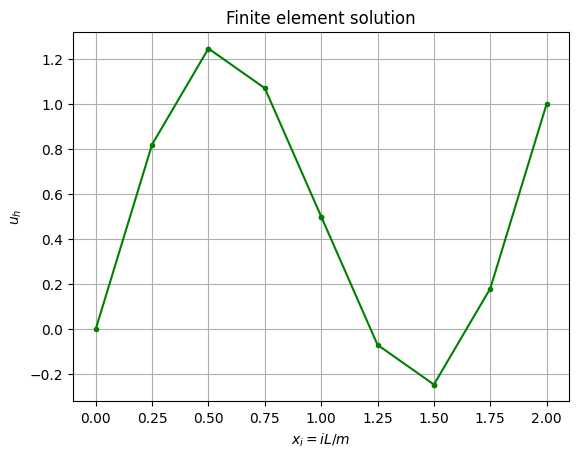

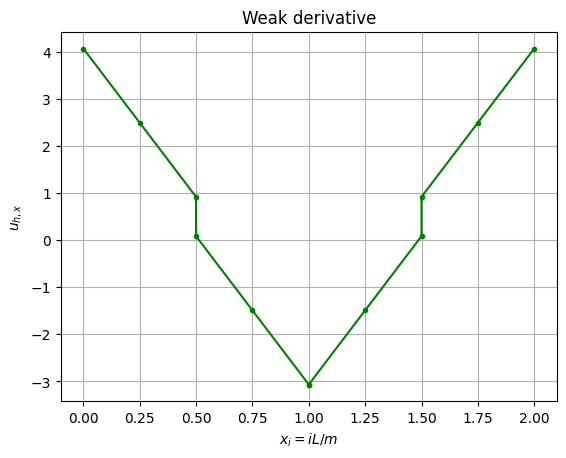

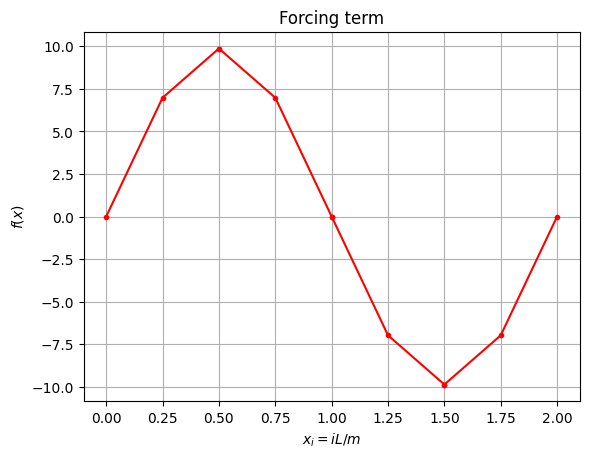

In [82]:
u = np.zeros(space['n'])
u_inner = np.linalg.solve(A, b)
u[1:-1] = u_inner 
u[0] = bc[0]
u[-1] = bc[-1]

x_eval, u_eval, du_dx_eval = evaluate_solution(p, k, neval, u, x)

#plt.plot(x_eval,np.sin(2*np.pi * x_eval) , 'b.-')
plt.plot(x_eval, u_eval, 'g.-')
plt.grid()
plt.xlabel(r'$x_i = i L/m$')
plt.ylabel(r'$u_{h}$')
plt.title(r'Finite element solution')
plt.savefig('finite_element_sol_1.png')

plt.figure()
plt.plot(x_eval, du_dx_eval, 'g.-')
plt.grid()
plt.xlabel(r'$x_i = i L/m$')
plt.ylabel(r'$u_{h,x}$')
plt.title(r'Weak derivative')
plt.savefig('weak_derivative_1.png')

plt.figure()
plt.plot(x_eval, np.pi**2*np.sin(np.pi*x_eval), 'r.-')
plt.grid()
plt.xlabel(r'$x_i = i L/m$')
plt.ylabel(r'$f(x)$')
plt.title(r'Forcing term')
plt.savefig('forcing_term_1.png')


In [86]:
m = 10
p = 2
k = 1
L = 2

neval = 3
x = np.linspace(0,L,m+1)
mesh = create_mesh(brk = x)
ref_data = create_ref_data(neval, deg = p, integrate = True)
space = create_fe_space(p, k, mesh)
param_map = create_param_map(mesh)


evaluation_points = ref_data['evaluation_points']
quadrature_weight = ref_data['quadrature_weights']

extraction_coefficients = space['extraction_coefficients']

reference_basis = ref_data['reference_basis']
reference_basis_derivatives = ref_data['reference_basis_derivatives']

bc = [0,1]
A, b = assemble_fe_problem(mesh, space, ref_data, param_map, problem_B2, problem_L2, bc)

print(A)
print(b)
np.savetxt('A.txt', A, fmt='%.6f') 


np.savetxt('b.txt', b, fmt='%.6f')


os.remove('O.zip')
with zipfile.ZipFile('O.zip', 'w') as zipf:
    zipf.write('A.txt')
    zipf.write('b.txt')
os.remove('A.txt')
os.remove('b.txt')

[[ 4.30403952 -0.5491818  -0.63893472  0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.5491818   4.03208559 -1.41159746 -0.83166667  0.          0.
   0.          0.          0.          0.        ]
 [-0.63893472 -1.41159746  5.11       -1.8350692  -1.02439861  0.
   0.          0.          0.          0.        ]
 [ 0.         -0.83166667 -1.8350692   6.18791441 -2.17766503 -1.1435135
   0.          0.          0.          0.        ]
 [ 0.          0.         -1.02439861 -2.17766503  6.85410215 -2.308525
  -1.1435135   0.          0.          0.        ]
 [ 0.          0.          0.         -1.1435135  -2.308525    6.85410215
  -2.17766503 -1.02439861  0.          0.        ]
 [ 0.          0.          0.          0.         -1.1435135  -2.17766503
   6.18791441 -1.8350692  -0.83166667  0.        ]
 [ 0.          0.          0.          0.          0.         -1.02439861
  -1.8350692   5.11       -1.41159746 -0.63893472]
 [ 0.          0.          

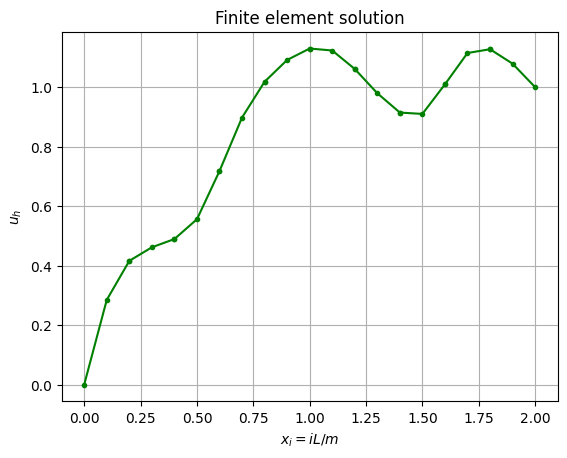

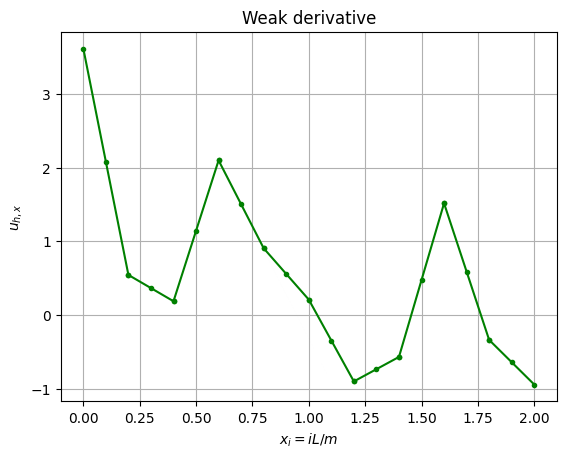

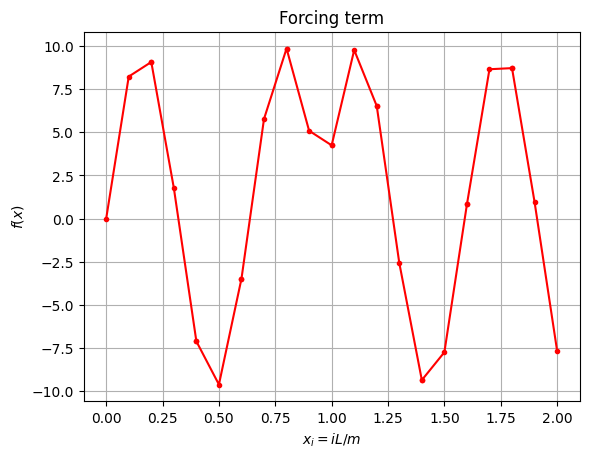

In [84]:
u = np.zeros(space['n'])
u_inner = np.linalg.solve(A, b)
u[1:-1] = u_inner 
u[0] = bc[0]
u[-1] = bc[-1]

x_eval, u_eval, du_dx_eval = evaluate_solution(p, k, neval, u, x)

#plt.plot(x_eval,np.sin(2*np.pi * x_eval) , 'b.-')
plt.plot(x_eval, u_eval, 'g.-')
plt.grid()
plt.xlabel(r'$x_i = i L/m$')
plt.ylabel(r'$u_{h}$')
plt.title(r'Finite element solution')
plt.savefig('finite_element_sol_2.png')

plt.figure()
plt.plot(x_eval, du_dx_eval, 'g.-')
plt.grid()
plt.xlabel(r'$x_i = i L/m$')
plt.ylabel(r'$u_{h,x}$')
plt.title(r'Weak derivative')
plt.savefig('weak_derivative_2.png')

plt.figure()
plt.plot(x_eval, np.pi**2*np.sin(np.pi**2*x_eval)*np.where(x_eval < 1, 1, -1), 'r.-')
plt.grid()
plt.xlabel(r'$x_i = i L/m$')
plt.ylabel(r'$f(x)$')
plt.title(r'Forcing term')
plt.savefig('forcing_term_2.png')
